In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phone-recommended/ndtv_data_final.csv


In [3]:
df = pd.read_csv("/kaggle/input/phone-recommended/ndtv_data_final.csv")

In [4]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [13]:
df["Brand"].value_counts()

Brand
Intex        117
Samsung      101
Micromax      71
Lava          59
Panasonic     55
            ... 
Onida          1
Aqua           1
Jio            1
Razer          1
Philips        1
Name: count, Length: 76, dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
data = df[["Brand" ,"Battery capacity (mAh)" , 'RAM (MB)' ,'Internal storage (GB)' ,
            'Price' ,'Rear camera' , 'Front camera']]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   1359 non-null   object 
 1   Battery capacity (mAh)  1359 non-null   int64  
 2   RAM (MB)                1359 non-null   int64  
 3   Internal storage (GB)   1359 non-null   float64
 4   Price                   1359 non-null   int64  
 5   Rear camera             1359 non-null   float64
 6   Front camera            1359 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 74.4+ KB


In [8]:
categorical_features = ['Brand']

In [9]:
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(data[categorical_features]).toarray()

In [10]:
categorical_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [11]:
numerical_features = ['Battery capacity (mAh)', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Price']

In [12]:
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(data[numerical_features])

In [13]:
final_feature_matrix = pd.concat([pd.DataFrame(numerical_scaled), pd.DataFrame(categorical_encoded)], axis=1)

In [14]:
final_feature_matrix.head()

,0,1,2,3,4,5,0,1,2,3,...,66,67,68,69,70,71,72,73,74,75
0,0.616232,1.000000,0.499937,0.444444,0.333333,0.335274,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.599198,0.497319,0.124891,0.592593,0.333333,0.157625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.592986,0.329759,0.124891,0.111111,0.250000,0.609790,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.420842,0.329759,0.124891,0.111111,0.250000,0.357636,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.599198,0.497319,0.249906,0.111111,0.666667,0.283651,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
k = 4  # Adjust the number of clusters based on analysis
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(final_feature_matrix)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_30/557984452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(final_feature_matrix)


In [16]:
data.head()

,Brand,Battery capacity (mAh),RAM (MB),Internal storage (GB),Price,Rear camera,Front camera,Cluster
0,OnePlus,4085,12000,256.0,58998,48.0,16.0,1
1,Realme,4000,6000,64.0,27999,64.0,16.0,1
2,Apple,3969,4000,64.0,106900,12.0,12.0,1
3,Apple,3110,4000,64.0,62900,12.0,12.0,1
4,LG,4000,6000,128.0,49990,12.0,32.0,1


In [17]:
['Battery capacity (mAh)', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Price']

['Battery capacity (mAh)',
 'RAM (MB)',
 'Internal storage (GB)',
 'Rear camera',
 'Front camera',
 'Price']

In [21]:
def get_recommendations(user_input, data, top_n=5):
    # Create a feature vector from user input (numerical)
    user_vector = [user_input['Battery'], user_input['RAM'] * 1024, user_input['Storage'], user_input['Rear camera'],
                   user_input['Front camera'], user_input['Price']]
    
    # Scale the numerical features
    user_vector_scaled = scaler.transform([user_vector])  # Scale user input

    # Handle the categorical feature (Brand)
    user_vector2 = [[user_input['Brand']]]  # Make sure it's 2D array
    user_vector_encoded = encoder.transform(user_vector2).toarray()  # Encode the categorical feature

    # Concatenate scaled numerical features with encoded categorical features
    final_user_vector = pd.concat([pd.DataFrame(user_vector_scaled), pd.DataFrame(user_vector_encoded)], axis=1)

    # Assign cluster to user input
    user_cluster = kmeans.predict(final_user_vector)

    # Filter phones in the same cluster
    similar_phones = data[data['Cluster'] == user_cluster[0]]

    # Get the indices of similar phones in the final feature matrix
    similar_phones_indices = similar_phones.index

    # Calculate similarity between user input and phones in the same cluster
    user_similarity = cosine_similarity(final_user_vector, final_feature_matrix.loc[similar_phones_indices])

    # Get top N similar phones (excluding the first one)
    similarity_scores = list(enumerate(user_similarity[0]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_phones_indices = [similar_phones_indices[i[0]] for i in similarity_scores[:top_n]]  # Map back to original indices

    return data.loc[top_phones_indices][['Brand','RAM (MB)' ,'Internal storage (GB)','Price','Rear camera','Front camera','Cluster' ]]

# Sample user input
user_input = {
    "Brand": "BlackBerry",
    "Price": 79900,        # Price in USD
    "RAM": 8,            # RAM in GB
    "Storage": 128, 
    "Rear camera": 64,
    "Front camera": 16,
    "Battery": 4085      # Battery in mAh
}

# Get recommendations
recommended_phones = get_recommendations(user_input, data)
print(recommended_phones)


           Brand  RAM (MB)  Internal storage (GB)  Price  Rear camera  \
1013  BlackBerry      4000                   32.0  16999         21.0   
816   BlackBerry      4000                   32.0  29999         12.0   
291   BlackBerry      4000                   64.0  22990         13.0   
721   BlackBerry      4000                   64.0  19994         12.0   
698   BlackBerry      4000                   64.0  13999         13.0   

      Front camera  Cluster  
1013           8.0        1  
816            8.0        1  
291            8.0        1  
721            8.0        1  
698           16.0        1  


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [56]:
data.head()

,Brand,Battery capacity (mAh),RAM (MB),Internal storage (GB),Price,Rear camera,Front camera,Cluster
0,OnePlus,4085,12000,256.0,58998,48.0,16.0,1
1,Realme,4000,6000,64.0,27999,64.0,16.0,1
2,Apple,3969,4000,64.0,106900,12.0,12.0,1
3,Apple,3110,4000,64.0,62900,12.0,12.0,1
4,LG,4000,6000,128.0,49990,12.0,32.0,1


In [59]:
# Group by Cluster and compute summary statistics
cluster_summary = data.groupby('Cluster').agg({
    'Battery capacity (mAh)': ['mean', 'median', 'std'],
    'RAM (MB)': ['mean', 'median', 'std'],
    'Internal storage (GB)': ['mean', 'median', 'std'],
    'Price': ['mean', 'median', 'std'],
    'Rear camera': ['mean', 'median', 'std'],
    'Front camera': ['mean', 'median', 'std']
})
cluster_summary = pd.DataFrame(cluster_summary)


In [60]:
cluster_summary.head()

Battery capacity (mAh)                         RAM (MB)          \
                          mean  median         std         mean  median   
Cluster                                                                   
0                  3286.437908  3260.0  862.069815  3573.183007  3000.0   
1                  3023.078206  3000.0  846.824509  2599.366006  2000.0   
2                  2342.784091  2275.0  671.850050  1324.863636  1000.0   
3                  2522.816901  2300.0  903.449237  1543.436620  1000.0   

                     Internal storage (GB)                           Price  \
                 std                  mean median        std          mean   
Cluster                                                                      
0        2242.394800             53.040261   32.0  60.836862  19102.006536   
1        1564.983421             31.909022   16.0  33.854830  11893.860271   
2         768.353240             10.784364    8.0   6.725563   4980.198864   
3         883.976805             14.732394    8.0  16.876829   5305.957746   

                               Rear camera                   Front camera  \
          median           std        mean median        std         mean   
Cluster                                                                     
0        12990.0  22901.281162   15.648366   13.0  12.649610    11.226797   
1         7499.0  12944.575743   12.790302   13.0   8.710163     7.271950   
2         4516.0   2220.300471    6.517614    5.0   3.261161     3.148864   
3         4790.0   2608.148804    8.397183    8.0   3.844921     4.491549   

                          
        median       std  
Cluster                   
0          8.0  9.204597  
1          5.0  5.884857  
2          2.0  2.476241  
3          5.0  3.450580

In [62]:
# Group by Cluster and Brand, and count the occurrences of each brand in each cluster
brand_count_per_cluster = data.groupby(['Cluster', 'Brand']).size().unstack(fill_value=0)

# Display the count of brands in each cluster
print(brand_count_per_cluster)

# Count the number of unique brands in each cluster
unique_brands_per_cluster = data.groupby('Cluster')['Brand'].nunique()

# Display the number of unique brands in each cluster
print("\nNumber of unique brands in each cluster:")
print(unique_brands_per_cluster)


Brand    10.or  Acer  Alcatel  Apple  Aqua  Asus  Billion  Black Shark  \
Cluster                                                                  
0            0     0        0      0     0     0        0            0   
1            5     2       10     17     1    37        1            1   
2            0     0        0      0     0     0        0            0   
3            0     0        0      0     0     0        0            0   

Brand    BlackBerry  Blu  ...  Xolo  Yu  ZTE  Zen  Ziox  Zopo  Zuk  iBall  \
Cluster                   ...                                               
0                 0    0  ...     0   0    0    0     0     0    0      0   
1                17    2  ...    25  13    8   11     9    12    1     14   
2                 0    0  ...     0   0    0    0     0     0    0      0   
3                 0    0  ...     0   0    0    0     0     0    0      0   

Brand    iVoomi  mPhone  
Cluster                  
0             0       0  
1            1

/tmp/ipykernel_30/2479810901.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


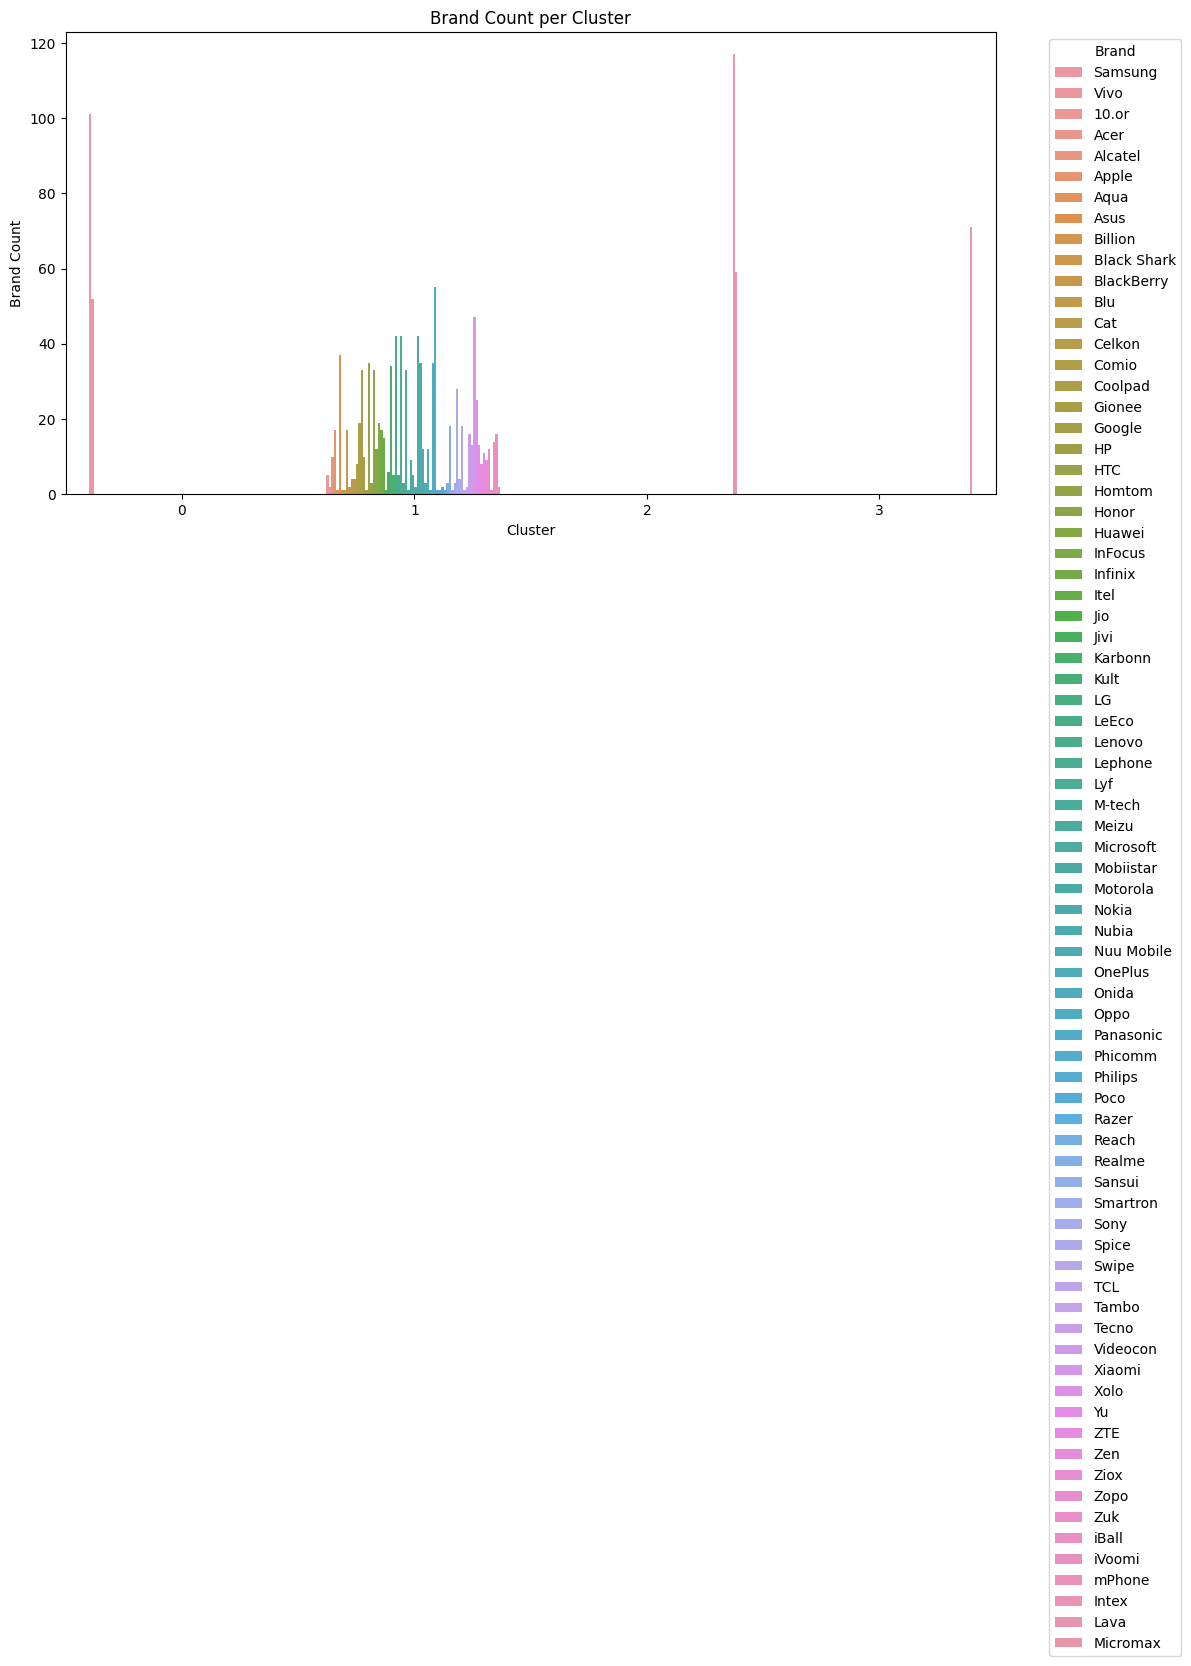

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Cluster and Brand, and count the occurrences of each brand in each cluster
brand_count_per_cluster = data.groupby(['Cluster', 'Brand']).size().reset_index(name='Count')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Count', hue='Brand', data=brand_count_per_cluster)

# Add title and labels
plt.title('Brand Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Brand Count')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
